In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('cardio_train.csv',sep=';')

In [75]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [76]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

C:\Users\shari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

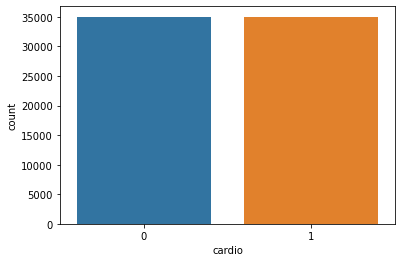

In [77]:
sns.countplot(df['cardio'])

In [78]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

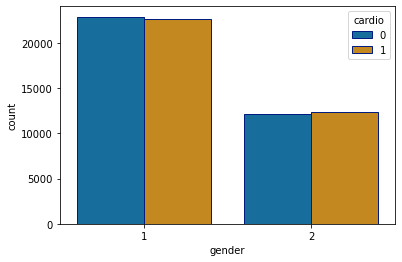

In [79]:
sns.countplot(x='gender',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [80]:
df['yr'] = (df['age']/365).round(0)

In [81]:
df['yr']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: yr, Length: 70000, dtype: float64

<AxesSubplot:xlabel='yr', ylabel='count'>

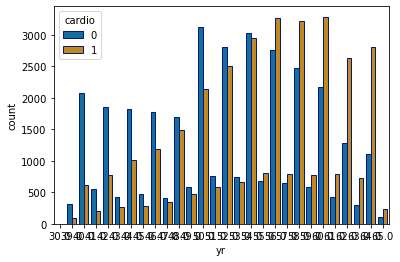

In [82]:
sns.countplot(x='yr',hue='cardio',data=df,palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

# Random Forest

In [83]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [84]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


In [85]:
df=df.drop(['yr','id'],axis=1)

In [86]:
x=df.iloc[:,:-1]

In [87]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [88]:
y=df.iloc[:,11]

In [89]:
y

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.30,random_state=1)

In [92]:
xtrain

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
23561,16136,2,169,71.0,100,80,1,1,1,0,1
34858,14615,1,158,69.0,140,80,2,1,0,0,1
54953,20507,1,164,65.0,120,80,1,1,0,0,1
59230,16720,1,153,53.0,100,60,1,1,0,0,1
1730,21050,1,159,71.0,140,90,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49100,21289,2,175,78.0,120,80,1,1,0,0,1
20609,19116,1,164,68.0,120,80,1,1,0,0,0
21440,18049,2,178,82.0,120,80,1,1,0,0,1
50057,21957,1,169,77.0,120,80,1,1,0,0,0


# Now we will use Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
Rclf = RandomForestClassifier()

In [95]:
Rclf.fit(xtrain,ytrain)

RandomForestClassifier()

In [96]:
Rclf.score(xtest,ytest)

0.715952380952381

# Decision Tree

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
clf = DecisionTreeClassifier()

In [99]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [100]:
clf.score(xtest,ytest)

0.6324761904761905

# Save ML Models

In [101]:
import pickle as pk
with open('Cardio_Check_Model_1', 'wb') as file:
    pk.dump(Rclf,file)

# Feature Selection

In [102]:
from sklearn.feature_selection import SelectKBest

In [103]:
from sklearn.feature_selection import f_classif

In [104]:
FIT_FEATURES = SelectKBest(score_func=f_classif)

In [105]:
FIT_FEATURES.fit(x,y)

SelectKBest()

In [106]:
score_col = pd.DataFrame(FIT_FEATURES.scores_,columns = ['score value'])

In [107]:
name_col = pd.DataFrame(x.columns)

In [108]:
top_features = pd.concat([name_col,score_col],axis=1)

In [109]:
top_features

,0,score value
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [110]:
top_features.nlargest(7,'score value')

,0,score value
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494


In [121]:
x_new = df[["age", "cholesterol","weight","gluc","ap_lo","ap_hi","active","smoke"]]

In [122]:
x_new

,age,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
0,18393,1,62.0,1,80,110,1,0
1,20228,3,85.0,1,90,140,1,0
2,18857,3,64.0,1,70,130,0,0
3,17623,1,82.0,1,100,150,1,0
4,17474,1,56.0,1,60,100,0,0
...,...,...,...,...,...,...,...,...
69995,19240,1,76.0,1,80,120,1,1
69996,22601,2,126.0,2,90,140,1,0
69997,19066,3,105.0,1,90,180,0,0
69998,22431,1,72.0,2,80,135,0,0


In [123]:
y_new = df["cardio"]

In [124]:
y_new

0        0
1        1
2        1
3        1
4        0
        ..
69995    0
69996    1
69997    1
69998    1
69999    0
Name: cardio, Length: 70000, dtype: int64

In [125]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y_new,test_size=.30,random_state=1)

In [126]:
from sklearn.ensemble import RandomForestClassifier

In [127]:
Rfc = RandomForestClassifier()

In [128]:
Rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [129]:
Rfc.score(xtest,ytest)

0.6915714285714286

In [130]:
xtest

,age,cholesterol,weight,gluc,ap_lo,ap_hi,active,smoke
6670,16099,1,93.0,1,90,140,1,0
49567,14437,1,89.0,1,80,120,1,0
50796,19839,1,66.0,1,90,150,1,0
22310,18050,2,88.0,2,100,160,1,1
54037,16819,1,78.0,1,90,140,0,0
...,...,...,...,...,...,...,...,...
15691,18263,1,70.0,1,80,120,1,0
25200,21081,3,60.0,1,70,120,1,0
7366,14716,1,68.0,1,60,100,1,0
56399,21998,1,66.0,1,80,110,1,0


# Feature Importance

In [134]:
from sklearn.ensemble import ExtraTreesClassifier

In [135]:
model = ExtraTreesClassifier()

In [136]:
model.fit(x,y)

ExtraTreesClassifier()

In [137]:
model.feature_importances_

array([0.28808594, 0.00527832, 0.17071774, 0.17939324, 0.17900649,
       0.10871796, 0.04499578, 0.01135271, 0.00408497, 0.0041065 ,
       0.00426035])

In [138]:
top = pd.Series(model.feature_importances_, index = x.columns)

In [139]:
top

age            0.288086
gender         0.005278
height         0.170718
weight         0.179393
ap_hi          0.179006
ap_lo          0.108718
cholesterol    0.044996
gluc           0.011353
smoke          0.004085
alco           0.004107
active         0.004260
dtype: float64

C:\Users\shari\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1616: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


<AxesSubplot:ylabel='None'>

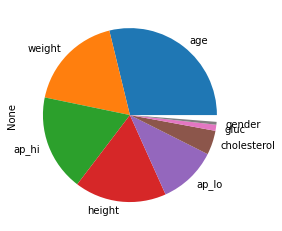

In [148]:
top.nlargest(8).plot(kind='pie')